In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

In [2]:
Data_dir = '/content/drive/My Drive/Colab Notebooks/DataSets/MachineHack Competition/'
train = pd.read_csv(Data_dir+ 'Train.csv')
test = pd.read_csv(Data_dir + 'Test.csv')

In [3]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [ ]:
def df_trans(train):
  train['Date_Time'] = pd.to_datetime(train['InvoiceDate'])
  train['Date'] = train['Date_Time'].dt.date
  train['Year'] = train['Date_Time'].dt.year
  train['Month'] = train['Date_Time'].dt.month
  train['Day'] = train['Date_Time'].dt.day
  train['Time'] = train['Date_Time'].dt.time
  train['Weekday'] = train['Date_Time'].dt.weekday
  train['Timelight'] = train['Time'].apply(lambda x : 'Morning' if 6<=x.hour<12 else ('Noon' if 12<=x.hour<18 else 'Night' ))
  train.drop(['InvoiceDate','Date_Time','Time','Date_Time','Date'],axis = 1,inplace=True)
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  train['Weekday'] = train['Weekday'].apply(lambda x: day_name[x])
  #train['Quantity'] = abs(train['Quantity'])
  #train['Month'] = train['Month'].apply(lambda x: 'Q1' if x in range(1,4) else ( 'Q2' if x in range(4,7) else ( 'Q3' if x in range(7,10) else 'Q')) )
  #train['Day'] = train['Day'].apply(lambda x: 'week1' if x in range(1,8) else ( 'week2' if x in range(8,15) else ( 'week3' if x in range(15,22) else 'week4')) )
  return train
df = df_trans(train)

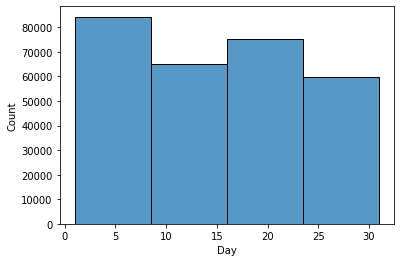

In [ ]:

sns.histplot(df['Day'],bins=4,)

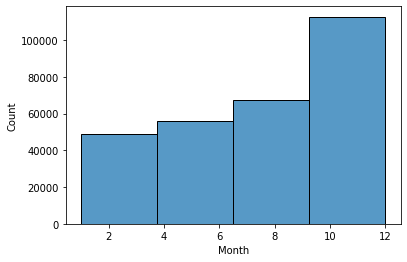

In [ ]:
sns.histplot(df['Month'],bins=4)

In [ ]:
def data_transform(train):
  train['Month'] = train['Month'].apply(lambda x: 'Q1' if x in range(1,4) else ( 'Q2' if x in range(4,7) else ( 'Q3' if x in range(7,10) else 'Q4')) )
  train['Day'] = train['Day'].apply(lambda x: 'week1' if x in range(1,8) else ( 'week2' if x in range(8,15) else ( 'week3' if x in range(15,22) else 'week4')) )
  train.drop(['Description'],axis = 1,inplace=True)
  return train
df = data_transform(df)

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Timelight
0,6141,1583,3,3.75,14056.0,35,2011,Q2,week1,Friday,Noon
1,6349,1300,6,1.95,13098.0,35,2011,Q2,week2,Wednesday,Morning
2,16783,2178,4,5.95,15044.0,35,2011,Q4,week3,Sunday,Noon
3,16971,2115,1,0.83,15525.0,35,2011,Q4,week4,Tuesday,Noon
4,6080,1210,12,1.65,13952.0,35,2011,Q2,week1,Friday,Morning


(284780, 11)


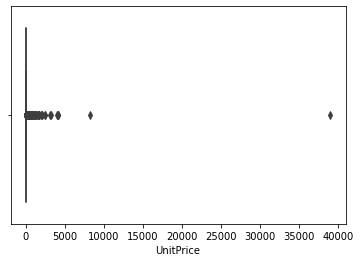

In [ ]:
sns.boxplot(x='UnitPrice',data=df)
print(df.shape)

In [ ]:
df = df[df['UnitPrice'] < 2000]
df.shape

(284768, 11)

(284768, 11)


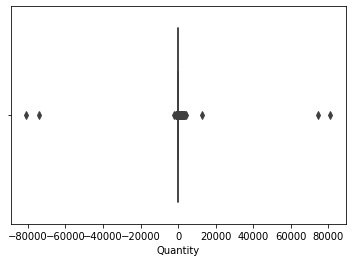

In [ ]:
sns.boxplot(x='Quantity',data=df)
print(df.shape)

In [ ]:

df = df[(df['Quantity'] < 10000) &(df['Quantity'] > -10000)]
df['Quantity'] = abs(df['Quantity'])
df.shape

(284763, 11)

Removing 13 Outliers In total for Better Accuracy of ML Model !

# EDA

In [ ]:
#sns.catplot(data=df, kind="bar", x="Month", y="UnitPrice", hue="Day")

In [ ]:
#sns.jointplot(data=df, x="Quantity", y="UnitPrice", hue="Timelight")


In [ ]:
df.corr()['UnitPrice']

InvoiceNo     0.011279
StockCode     0.061490
Quantity     -0.029828
UnitPrice     1.000000
CustomerID   -0.018458
Country      -0.022806
Year         -0.000547
Name: UnitPrice, dtype: float64

In [ ]:
for i in df:
  print(i)

InvoiceNo
StockCode
Quantity
UnitPrice
CustomerID
Country
Year
Month
Day
Weekday
Timelight


In [ ]:

for i in range(0,len(df)):
  if df.iloc[i,3] == 0 :
    a = df.iloc[i,3]
    df.iloc[i,3] = df[df.StockCode == a].UnitPrice.mode()[0]

df[df.StockCode==1220].UnitPrice.mode()  

0    0.39
dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

num_attribs = ['StockCode','Quantity','CustomerID','InvoiceNo']
cat_attribs = ['Weekday','Year','Timelight','Country','Month','Day']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X= df[['StockCode', 'Quantity', 'Country','Year','Weekday','CustomerID','InvoiceNo','Timelight','Month','Day']]
y = df['UnitPrice']
X = full_pipeline.fit_transform(X)

In [ ]:
X.shape

(284763, 60)

In [ ]:
"""
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)
"""

"\nfrom sklearn.preprocessing import PowerTransformer\ny = y.values.reshape(-1,1)\n# power transform the raw data\npower = PowerTransformer(method='yeo-johnson', standardize=True)\ny = power.fit_transform(y)\n"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=None,shuffle=True)


## **Decision Tree**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor( max_depth=20,
  max_features='auto', max_leaf_nodes=None,
  min_impurity_split=1e-08, min_samples_leaf=2,
  min_samples_split=2, min_weight_fraction_leaf=0.0,random_state=4)
tree_reg.fit(X_train,y_train)

predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


13.236327258798074

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=30)
forest_scores = cross_val_score(tree_reg,X,y,scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [15.40236362 22.24602365  8.43894261 15.67341623 11.52337685]
Mean: 14.656824592329182
Standard deviation: 4.640383183109386


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grid = {"criterion": ["friedman_mse"],
              "min_samples_split": [20,50],
              "max_depth": [20,30,40],
              "max_features" : ['auto']
              }
dtr = DecisionTreeRegressor()
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5,scoring='neg_root_mean_squared_error',n_jobs = -1,verbose=10)
grid_cv_dtr.fit(X,y)
print(grid_cv_dtr.best_params_)
print(grid_cv_dtr.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.3min finished


{'criterion': 'friedman_mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 20}
-12.001867881354569


In [ ]:
grid_cv_dtr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 50}

# Random Forest

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=20, random_state=10)

rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print('The error in Random forest Regression df is: '+ str(np.sqrt(mean_squared_error(y_test, pred_rfr))))

The error in Random forest Regression df is: 12.793901910808142


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

rfr = RandomForestRegressor(n_estimators=100, random_state=10)

forest_scores = cross_val_score(rfr,X,y,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 9.58741667 18.66555291  8.4220707  10.68938398  8.2005151 ]
Mean: 11.112987873400773
Standard deviation: 3.8799891581314125


# **XGBoosting**

In [ ]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error
"""data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,shuffle=True)"""

xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 15, 
                          alpha = 100, n_estimators = 100)

xgb_reg.fit(X_train,y_train)
preds = xgb_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[09:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 13.353383


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
import xgboost as xgb

from sklearn.model_selection import cross_val_score
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 15, alpha = 100, n_estimators = 100,eval_metric = 'rmse')
xgb_scores = cross_val_score(xgb_reg,X,y,scoring="neg_mean_squared_error", cv=5)
xgb_scores = np.sqrt(-xgb_scores)
display_scores(xgb_scores)

Scores: [ 7.67608028 20.26231316  8.77197723 10.93696612  8.17094729]
Mean: 11.16365681618672
Standard deviation: 4.68351508212161


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
params = {"objective":["reg:squarederror"],'colsample_bytree':[0.3],'learning_rate': [0.1],'max_depth':[15], 'alpha': [100],"tree_method" : ["auto"]}
xgb = xgb.XGBRegressor()
xgb_search=GridSearchCV(estimator=xgb,param_grid=params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5)
xgb_search.fit(X,y)
print(xgb_search.best_params_)
xgb_search.cv_results_

[09:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'alpha': 100, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 15, 'objective': 'reg:linear', 'tree_method': 'auto'}


{'mean_fit_time': array([41.08460045, 68.627566  , 40.64672556, 69.05437827]),
 'mean_score_time': array([2.03800159, 3.67152491, 1.95522671, 4.63866062]),
 'mean_test_score': array([-13.75033465, -13.71616732, -11.16365682, -11.2381439 ]),
 'param_alpha': masked_array(data=[100, 100, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.3, 0.3, 0.3, 0.3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[15, 25, 15, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_objective': masked_array(data=['reg:linear', 'reg:linear', 'reg:linear', 'reg:linear'],
              

In [ ]:
xgb_search.best_score_

-11.16365681618672

# **AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
ada_reg = AdaBoostRegressor( DecisionTreeRegressor(max_depth=10), n_estimators=100, loss = 'square',learning_rate = 0.1)
ada_scores = cross_val_score(ada_reg,X,y,scoring="neg_mean_squared_error", cv=5)
ada_scores = np.sqrt(-ada_scores)
display_scores(ada_scores)

Scores: [12.40571235 20.39002052  8.60703572 13.45034525 11.34494926]
Mean: 13.239612618849435
Standard deviation: 3.922209812751259


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

ada=AdaBoostRegressor()
search_grid={'n_estimators':[50,100,200],'learning_rate':[0.01,0.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=10)
search.fit(X,y)
search.best_params_
search.cv_results_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.2s


KeyboardInterrupt: ignored

In [ ]:
search.best_score_

-21.972805181342878

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17.201879401188965

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)


ridge_reg.fit(X_train,y_train)

predictions = ridge_reg.predict(X_test)

ridge_mse = mean_squared_error(y_test, predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

17.20187622766957

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train,y_train)

predictions = lasso_reg.predict(X_test)

lasso_mse = mean_squared_error(y_test, predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

18.1186221871866

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

elastic_reg.fit(X_train,y_train)

predictions = elastic_reg.predict(X_test)

Elastic_mse = mean_squared_error(y_test, predictions)
Elastic_rmse = np.sqrt(Elastic_mse)
Elastic_rmse

17.205233561400078

# HistGradientBoostingRegressor

In [ ]:
# To use this experimental feature, we need to explicitly ask for it
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

est = HistGradientBoostingRegressor()

X_train = X_train.toarray()
X_test = X_test.toarray()

est.fit(X_train,y_train)

predictions = est.predict(X_test)
est_mse = mean_squared_error(y_test, predictions)
est_rmse = np.sqrt(est_mse)
est_rmse

AttributeError: ignored

# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel="linear",C=1.0, epsilon=0.2)

svr.fit(X_train,y_train)

predictions = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

## **Neural Network Using Keras & TF**

In [ ]:
X= df[['StockCode', 'Quantity', 'Country','Year','Weekday','CustomerID','InvoiceNo','Description']]
y = df['UnitPrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=None,shuffle=True)

In [ ]:
for var in [X_train, X_test, y_train, y_test]:
  print( var.shape)

(227813, 14)
(56954, 14)
(227813,)
(56954,)


In [ ]:
X_train  = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)
for var in [X_train, X_test, y_train, y_test]:
  print( var.shape)


ValueError: ignored

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

AttributeError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import tensorflow as tf
import torch
model = Sequential()
model.add(Dense(50, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])

model.fit(X_train,y_train,epochs=100,batch_size=10)

predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

Epoch 1/100
22782/22782 [==============================] - 53s 2ms/step - loss: 288.5315 - accuracy: 2.5459e-04 - root_mean_squared_error: 16.9862
Epoch 2/100
22782/22782 [==============================] - 52s 2ms/step - loss: 280.5410 - accuracy: 2.5898e-04 - root_mean_squared_error: 16.7494
Epoch 3/100
22782/22782 [==============================] - 52s 2ms/step - loss: 273.3856 - accuracy: 2.4582e-04 - root_mean_squared_error: 16.5344
Epoch 4/100
22782/22782 [==============================] - 53s 2ms/step - loss: 268.7631 - accuracy: 2.4582e-04 - root_mean_squared_error: 16.3940
Epoch 5/100
22782/22782 [==============================] - 52s 2ms/step - loss: 264.6126 - accuracy: 2.3704e-04 - root_mean_squared_error: 16.2669
Epoch 6/100
22782/22782 [==============================] - 51s 2ms/step - loss: 263.2237 - accuracy: 2.2826e-04 - root_mean_squared_error: 16.2242
Epoch 7/100
22782/22782 [==============================] - 51s 2ms/step - loss: 262.4820 - accuracy: 2.3265e-04 - root

13.701564621735049

In [ ]:
model.save(Data_dir + "keras_NN_3")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/DataSets/MachineHack Competition/keras_NN_3/assets


# **Predictiong Test Values & Submission**

In [ ]:
test = pd.read_csv(Data_dir + 'Test.csv')

df_test = df_trans(test)

In [ ]:

df_test = data_transform(df_test)
df_test.head()

,InvoiceNo,StockCode,Quantity,CustomerID,Country,Year,Month,Day,Weekday,Timelight
0,3139,1709,3,16161.0,35,2011,Q1,week4,Tuesday,Noon
1,617,510,1,17341.0,35,2010,Q4,week2,Wednesday,Noon
2,14653,604,36,15158.0,35,2011,Q4,week4,Tuesday,Noon
3,8634,1478,2,16033.0,35,2011,Q2,week4,Monday,Noon
4,15546,3216,1,15351.0,35,2011,Q4,week1,Sunday,Noon


In [ ]:

test_df = full_pipeline.fit_transform(df_test)
test_df.shape

(122049, 60)

In [ ]:
#tree_reg.fit(X,y)
result =tree_reg.predict(test_df)
result

array([2.7375    , 2.61274336, 3.63      , ..., 1.50915888, 3.92666667,
       3.58666667])

In [ ]:
"""
result = pd.DataFrame(data=result)
result = power.inverse_transform(result)
#a_inverse_transformed
result
"""

'\nresult = pd.DataFrame(data=result)\nresult = power.inverse_transform(result)\n#a_inverse_transformed\nresult\n'

In [ ]:
submission_format = pd.read_csv(Data_dir +'Sample Submission.csv')
my_submission = pd.DataFrame(data=result,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.to_csv(Data_dir+'submission_tree_j.csv',index = False)

In [4]:
pred_1 = test = pd.read_csv(Data_dir + 'submission_tree_e.csv')
pred_2 = test = pd.read_csv(Data_dir + 'submission_tree_I.csv')

In [6]:
pred_1

,UnitPrice
0,2.6650
1,1.2500
2,4.9250
3,4.2250
4,6.0250
...,...
122044,0.4875
122045,1.4800
122046,1.2025
122047,3.9500


In [7]:
for i in range(2,70):
  exec(f'pred_{i+1} = (pred_{i} + pred_{i-1})/2 ') 

In [10]:
pred_70

,UnitPrice
0,3.095000
1,1.250000
2,4.930556
3,3.652778
4,5.808333
...,...
122044,0.463611
122045,1.340000
122046,1.213056
122047,3.950000


In [11]:
pred_70.to_csv(Data_dir+'submission_tree_K.csv',index = False)